In [1]:
#Importing libraries 
import cv2
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.regularizers import l2

In [2]:
#loading the images 

img_dir = '/home/iggy/Downloads/images' #directory of the images 
data_path = os.path.join(img_dir,'*g')

images = glob.glob(data_path)


In [3]:
train = pd.read_csv("/home/iggy/Downloads/train_labels.csv")

train_images_list = train['image'].tolist()

y = train['target'].tolist()



images_list = os.listdir(img_dir)

test_images_list = [fn for fn in images_list if fn not in train_images_list]

train_data = []

In [4]:
img_size = 48 #gonna resize images to 48 pixels 

In [5]:
def get_train_data():
    X_train = []
    y_train = []
    print(len(images))
    print(len(train_images_list))
    print(images[0].split('/')[5])
    
    test_data = []
    
    for i in images:
        
        if i.split('/')[5] not in train_images_list:
            test_data.append(i)
        else:
            X_train.append(i)
            
    
        
    return X_train, y_train, test_data
        

In [6]:
X_train, y_train, test_data= get_train_data()

1816
1308
scinyegbsxvszgingldfiggswajhji.jpg


In [7]:
X_train[:15]

['/home/iggy/Downloads/images/scinyegbsxvszgingldfiggswajhji.jpg',
 '/home/iggy/Downloads/images/dzjseqqhiwqnxopkdrxmkgxhqipjbl.jpg',
 '/home/iggy/Downloads/images/nneqklgzypswfswxvxajouvovutrkw.png',
 '/home/iggy/Downloads/images/azazbwzigdzxxsvmcizyuqgivdyhzn.jpg',
 '/home/iggy/Downloads/images/kbfprdfmuicvutpvutvwhctequtcvv.jpg',
 '/home/iggy/Downloads/images/zgvgjdxlrhfgoepmagvuivhnmfuuoq.jpg',
 '/home/iggy/Downloads/images/uqersobkusawmkpnxmeppqpydmswpc.jpg',
 '/home/iggy/Downloads/images/knpmsdjjupafsfktgfkvighqgvqwbj.jpg',
 '/home/iggy/Downloads/images/exfkjarfpkqwyzpfkolhmyijlgluit.jpg',
 '/home/iggy/Downloads/images/yuibmfqdhsawksrekgfnpynmttuirs.jpg',
 '/home/iggy/Downloads/images/ymzylicduucrjolqeskcegusxlvyoe.jpg',
 '/home/iggy/Downloads/images/ayoltpbaswdlkawidwfyxuzuepxbdv.png',
 '/home/iggy/Downloads/images/zkqrcnoehtkudvxaaljjvudmwulurn.png',
 '/home/iggy/Downloads/images/prkrkappwvvumujnlzbuicfjskwaau.jpg',
 '/home/iggy/Downloads/images/yazsmoufnxenxxgcspfqqsapuzrowe.j

In [8]:
len(X_train)

1307

In [9]:
test_data[4]

'/home/iggy/Downloads/images/cetwookalphtxhtbwgcpzfjpmasfic.png'

In [10]:
#validation and training set: 

val = train.sample(n=262, random_state=1234) #random sampled approx 20% of the data to be validation set: Use frac = 20% to use a %


In [11]:
#getting validation labels and image set
val_labels = []
val_img = []

for index, row in val.iterrows():
    xval, yval = row['image'], row['target']
    val_img.append(xval)
    val_labels.append(yval)

In [12]:
#importing valition images

def validation_images():
    val_images = []
    for i in val_img:
        valimg = cv2.resize(cv2.imread('/home/iggy/Downloads/images/{}'.format(i)), (img_size, img_size))
        val_images.append(np.array([valimg], dtype='float32'))
        
    return val_images


In [13]:
val_images = validation_images()

In [14]:
len(val_images), len(val_labels)

(262, 262)

In [15]:
#random sampling training set - here I butchered the sampling my g, can perhaps make it better by sampling on values that where not part of the validation set

x_val = train.sample(n=1046, random_state=1234)

In [16]:
X_train2 = []
y_train2 = []

#iterating over a pandas dataframe:

for index, row in x_val.iterrows():
    Xtrain2, ytrain2 = row['image'], row['target']
    X_train2.append(Xtrain2)
    y_train2.append(ytrain2)

In [17]:
def training_data2():
    training_data = []
    for i in X_train2:
        x_data = cv2.resize(cv2.imread('/home/iggy/Downloads/images/{}'.format(i)), (img_size, img_size))
        training_data.append(np.array([x_data], dtype='float32'))
    
    return training_data

In [18]:
data = training_data2()

In [19]:
len(data)

1046

In [20]:
#convert data to numpy arrays 

train_images = np.asarray(data) 
train_labels = np.asarray(y_train2) 
val_images = np.asarray(val_images) 
val_labels = np.asarray(val_labels) 

In [21]:
train_images.shape

(1046, 1, 48, 48, 3)

In [22]:
train_images = train_images.reshape(1046,48,48,3)

In [24]:
val_images = val_images.reshape(262,48, 48, 3)

In [26]:
#getting test images 
test_images = []
for i in test_data:
    img = cv2.resize(cv2.imread(i), (img_size, img_size))
    test_images.append(np.array([img], dtype='float32'))

In [27]:
len(test_images) #I think there is a mistake in the labelling of the underlying data, but I will investigate later 

509

In [28]:
test_images = np.asarray(test_images).reshape(509,48,48,3)

In [29]:
input_shape = (48,48,3)

In [31]:
train_images /= 255

In [32]:
#compare this to the one below:
data[0] #shows the effect of image normalization. To facilitate normalization it was crucial to have images of float32

array([[[[138., 126., 114.],
         [144., 132., 120.],
         [150., 138., 126.],
         ...,
         [152., 140., 128.],
         [146., 134., 122.],
         [139., 127., 115.]],

        [[142., 130., 118.],
         [148., 136., 124.],
         [155., 143., 131.],
         ...,
         [156., 144., 132.],
         [150., 138., 126.],
         [144., 132., 120.]],

        [[146., 134., 122.],
         [152., 140., 128.],
         [158., 146., 134.],
         ...,
         [159., 147., 135.],
         [154., 142., 130.],
         [148., 136., 124.]],

        ...,

        [[208., 208., 201.],
         [ 39.,  50.,  63.],
         [ 37.,  40.,  45.],
         ...,
         [237., 233., 222.],
         [236., 232., 221.],
         [234., 230., 219.]],

        [[193., 195., 190.],
         [ 43.,  56.,  71.],
         [ 35.,  38.,  43.],
         ...,
         [239., 235., 224.],
         [236., 232., 221.],
         [236., 232., 221.]],

        [[170., 173., 170.],
       

In [33]:
train_images[0]

array([[[0.5411765 , 0.49411765, 0.44705883],
        [0.5647059 , 0.5176471 , 0.47058824],
        [0.5882353 , 0.5411765 , 0.49411765],
        ...,
        [0.59607846, 0.54901963, 0.5019608 ],
        [0.57254905, 0.5254902 , 0.47843137],
        [0.54509807, 0.49803922, 0.4509804 ]],

       [[0.5568628 , 0.50980395, 0.4627451 ],
        [0.5803922 , 0.53333336, 0.4862745 ],
        [0.60784316, 0.56078434, 0.5137255 ],
        ...,
        [0.6117647 , 0.5647059 , 0.5176471 ],
        [0.5882353 , 0.5411765 , 0.49411765],
        [0.5647059 , 0.5176471 , 0.47058824]],

       [[0.57254905, 0.5254902 , 0.47843137],
        [0.59607846, 0.54901963, 0.5019608 ],
        [0.61960787, 0.57254905, 0.5254902 ],
        ...,
        [0.62352943, 0.5764706 , 0.5294118 ],
        [0.6039216 , 0.5568628 , 0.50980395],
        [0.5803922 , 0.53333336, 0.4862745 ]],

       ...,

       [[0.8156863 , 0.8156863 , 0.7882353 ],
        [0.15294118, 0.19607843, 0.24705882],
        [0.14509805, 0

In [34]:
test_images /= 255

In [35]:
val_images /= 255

In [36]:
#One-hot-encoding the values 

train_labels = tensorflow.keras.utils.to_categorical(train_labels, 2) #convert the label data into one-hot categorical format
val_labels = tensorflow.keras.utils.to_categorical(val_labels, 2)

<IPython.core.display.Javascript object>


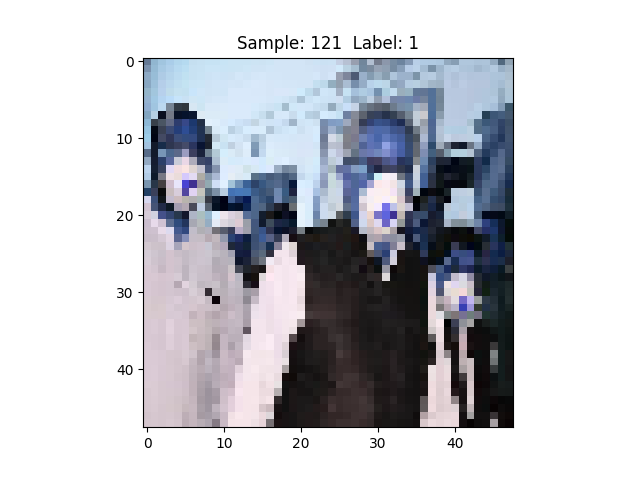

In [37]:
###### DATA VISUALIZATION ##################
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib notebook

def visualize_images(index):
    label = train_labels[index].argmax(axis=0) #only add .argmax if you one-hot encoded the labels
    image = train_images[index]
    plt.title('Sample: %d  Label: %d' % (index, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

## you can adjust the index number below to visualize different images, or write a for loop
visualize_images(121)

# Defining the neural network 

In [38]:
model = Sequential()

In [39]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [40]:
model.add(Conv2D(64, (3, 3), activation='relu'))

In [41]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [42]:
model.add(Dropout(0.25))

In [43]:
model.add(Flatten())

In [44]:
model.add(Dense(128, activation='relu'))

In [45]:
model.add(Dropout(0.5))

In [46]:
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01))) 

In [47]:
model.add(Dropout(0.5))

In [48]:
model.add(Dense(2, activation='sigmoid')) 

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [50]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [51]:
history = model.fit(train_images, train_labels,
                    batch_size=16,
                    epochs=10,
                    verbose=2,
                    validation_data=(val_images, val_labels))

Train on 1046 samples, validate on 262 samples
Epoch 1/10
1046/1046 - 4s - loss: 1.3109 - acc: 0.5143 - val_loss: 1.0775 - val_acc: 0.5153
Epoch 2/10
1046/1046 - 4s - loss: 0.9628 - acc: 0.5607 - val_loss: 0.8579 - val_acc: 0.6183
Epoch 3/10
1046/1046 - 4s - loss: 0.8083 - acc: 0.5903 - val_loss: 0.7486 - val_acc: 0.6031
Epoch 4/10
1046/1046 - 4s - loss: 0.7369 - acc: 0.6267 - val_loss: 0.6814 - val_acc: 0.7481
Epoch 5/10
1046/1046 - 4s - loss: 0.6436 - acc: 0.7089 - val_loss: 0.5780 - val_acc: 0.7271
Epoch 6/10
1046/1046 - 4s - loss: 0.5515 - acc: 0.7586 - val_loss: 0.4088 - val_acc: 0.8454
Epoch 7/10
1046/1046 - 4s - loss: 0.4359 - acc: 0.8265 - val_loss: 0.3358 - val_acc: 0.8817
Epoch 8/10
1046/1046 - 4s - loss: 0.3604 - acc: 0.8695 - val_loss: 0.2179 - val_acc: 0.9427
Epoch 9/10
1046/1046 - 4s - loss: 0.2666 - acc: 0.9254 - val_loss: 0.1665 - val_acc: 0.9504
Epoch 10/10
1046/1046 - 4s - loss: 0.2139 - acc: 0.9245 - val_loss: 0.1357 - val_acc: 0.9809


In [52]:
score = model.evaluate(val_images, val_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13568055697979817
Test accuracy: 0.980916


# Predictions 

In [53]:
#pred = model.predict(test_images, verbose=2)

In [54]:
#print(np.round(pred[:20], 3))

In [55]:
#testing with custom images. 
test2 = []

img1 = cv2.resize(cv2.imread('/home/iggy/Pictures/lerato1.png'), (img_size, img_size))
img2 = cv2.resize(cv2.imread('/home/iggy/Pictures/lerato2.png'), (img_size, img_size))

test2.append(np.array([img1], dtype = 'float32'))

test2.append(np.array([img2], dtype = 'float32'))

In [56]:
test2 = np.array(test2).reshape(2,48,48,3)

In [57]:
test2 /= 255

In [ ]:
pred2 = model.predict(test2, verbose=2)